# TMDB Movie Analysis Project

This notebook performs a structured analysis on movie data fetched from The Movie Database (TMDB) API. It covers:
- Data extraction
- Cleaning and transformation
- KPI analysis
- Visualizations


In [33]:
# Import required libraries
import requests
import pandas as pd
import ast

from dotenv import load_dotenv
import os



In [34]:
movie_ids = [0, 299534, 19995, 140607, 299536, 597, 135397,
420818, 24428, 168259, 99861, 284054, 12445,
181808, 330457, 351286, 109445, 321612, 260513]

In [35]:
# Fetching the data from TMDB API

API_KEY = os.getenv('api_key')
url = "https://api.themoviedb.org/3/movie/{}?api_key={}&append_to_response=credits" #Placeholders for the movie id and api key

movie_data = []
for movie_id in movie_ids:
    response = requests.get(url.format(movie_id, API_KEY))
    if response.status_code == 200: 
        movie_data.append(response.json())
    else:
        print(f"Failed to fetch data for ID: {movie_id}: {response.status_code}, {response.json()}")

    
data = pd.DataFrame(movie_data)
data.to_csv("raw_movie_data.csv", index=False)


Failed to fetch data for ID: 0: 404, {'success': False, 'status_code': 34, 'status_message': 'The resource you requested could not be found.'}


In [36]:
data.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,origin_country,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,credits
0,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,[US],en,...,2799439100,181,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,False,8.238,26214,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.avatar.com/movies/avatar,19995,tt0499549,[US],en,...,2923706026,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,False,7.588,32119,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,False,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,[US],en,...,2068223624,136,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has a story.,Star Wars: The Force Awakens,False,7.262,19667,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/avengers-infinit...,299536,tt4154756,[US],en,...,2052415039,149,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Destiny arrives all the same.,Avengers: Infinity War,False,8.236,30390,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,False,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,None,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.paramountmovies.com/movies/titanic,597,tt0120338,[US],en,...,2264162353,194,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Nothing on Earth could come between them.,Titanic,False,7.900,25867,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


In [37]:
data.head(2)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,origin_country,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,credits
0,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,[US],en,...,2799439100,181,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,False,8.238,26214,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.avatar.com/movies/avatar,19995,tt0499549,[US],en,...,2923706026,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,False,7.588,32119,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


### Dropping Columns

In [38]:
# Dropping specified columns
data.drop(columns=['adult', 'imdb_id', 'original_title', 'video', 'homepage'], inplace=True)


In [39]:
data.shape
print(f"Total number of rows: {data.shape[0]}. Total number of columns: {data.shape[1]}")

Total number of rows: 18. Total number of columns: 22


In [40]:
data.head(2)

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,credits
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",299534,[US],en,After the devastating events of Avengers: Infi...,24.2346,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,...,2019-04-24,2799439100,181,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,8.238,26214,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",32.6950,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,...,2009-12-15,2923706026,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,7.588,32119,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


In [41]:
# columns = ['belongs_to_collection', 'genres', 'production_countries','production_companies', 'spoken_languages'] 

# Some of the columns had dictionaries and lists, the functions below were used to extract the desired parts of
# the column we want

def clean_data_point_list(col):
    if isinstance(col, list): # The isinstance is used to check that the input col is in the list becuase the API might return a different data type
        names = []
        for item in col:
            names.append(item['name'])
        return '|'.join(names) #the join takes the list of names and concatenate then using a |
    

def clean_data_point_dict(data):
    if pd.notna and isinstance(data, dict): #This checks if data is not a missing value and a dictionary
        return data.get('name')
    return None

def extract_credits_info(credits):
    if isinstance(credits, str): #Check if its a string
        try:
            credits = ast.literal_eval(credits) #If it is it converts it into a dictionary
        except:
            return pd.Series([None, None, None, None]) #a placeholder for four extracted field in case except block catches it
        
# extracting the cast from the dictionary and if its not it will return an empty list
    cast = credits.get('cast', []) 
    crew = credits.get('crew', [])

    cast_names = '|'.join([person['name'] for person in cast if 'name' in person])
    cast_size = len(cast)

    directors = [person['name'] for person in crew if person.get('job') == 'Director']
    director_names = '|'.join(directors)
    crew_size = len(crew)

    return pd.Series([cast_names, cast_size, director_names, crew_size])



# extracting columns that have lists
data['genres'] = data['genres'].apply(clean_data_point_list)
data['production_countries'] = data['production_countries'].apply(clean_data_point_list)
data['production_companies'] = data['production_companies'].apply(clean_data_point_list)
data['spoken_languages'] = data['spoken_languages'].apply(clean_data_point_list)

#Extracting columns that have dictionaries
data['belongs_to_collection'] = data['belongs_to_collection'].apply(clean_data_point_dict)


#using lambda to extract the element in the origin country list eg. [US] and [GB]
data['origin_country'] = data['origin_country'].apply(lambda x: x[0] if isinstance(x, list) and x else x )

#extracting 'cast', 'cast_size', 'director', 'crew_size' from the credits column
data[['cast', 'cast_size', 'director', 'crew_size']] = data['credits'].apply(extract_credits_info)


In [42]:
data.head(2)

,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,status,tagline,title,vote_average,vote_count,credits,cast,cast_size,director,crew_size
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,The Avengers Collection,356000000,Adventure|Science Fiction|Action,299534,US,en,After the devastating events of Avengers: Infi...,24.2346,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,...,Released,Avenge the fallen.,Avengers: Endgame,8.238,26214,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo|Joe Russo,593
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,Avatar Collection,237000000,Action|Adventure|Fantasy|Science Fiction,19995,US,en,"In the 22nd century, a paraplegic Marine is di...",32.6950,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,...,Released,Enter the world of Pandora.,Avatar,7.588,32119,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,986


In [43]:
extracted_columns = ['belongs_to_collection', 'genres', 'production_countries','production_companies', 'spoken_languages']

#checking for anomalies in the respective columns using value_count()
for col in extracted_columns:
    print('***********************************************************************')
    print(data[col].value_counts())

***********************************************************************
belongs_to_collection
The Avengers Collection                4
Star Wars Collection                   2
Jurassic Park Collection               2
Frozen Collection                      2
Avatar Collection                      1
The Lion King (Reboot) Collection      1
The Fast and the Furious Collection    1
Black Panther Collection               1
Harry Potter Collection                1
The Incredibles Collection             1
Name: count, dtype: int64
***********************************************************************
genres
Adventure|Action|Science Fiction             3
Action|Adventure|Science Fiction|Thriller    2
Action|Adventure|Science Fiction             2
Adventure|Science Fiction|Action             1
Action|Adventure|Fantasy|Science Fiction     1
Drama|Romance                                1
Adventure|Drama|Family|Animation             1
Science Fiction|Action|Adventure             1
Action|Thriller

In [44]:
# Noticed that the genres and production countries Columns had some values 
# that can be one but due to positioning its seen a different value eg. US|UK and UK|US. 

data['genres'] = data['genres'].replace('Adventure|Science Fiction|Action', 'Action|Adventure|Science Fiction')
data['genres'] = data['genres'].replace('Adventure|Action|Science Fiction', 'Action|Adventure|Science Fiction')

data['production_countries'] = data['production_countries'].replace('United Kingdom|United States of America', 'United States of America|United Kingdom')

In [45]:
data['production_countries'].value_counts()

production_countries
United States of America                   16
United States of America|United Kingdom     2
Name: count, dtype: int64

In [46]:
data['genres'].value_counts()

genres
Action|Adventure|Science Fiction             6
Action|Adventure|Science Fiction|Thriller    2
Action|Adventure|Fantasy|Science Fiction     1
Drama|Romance                                1
Adventure|Drama|Family|Animation             1
Science Fiction|Action|Adventure             1
Action|Thriller|Crime                        1
Fantasy|Adventure                            1
Family|Animation|Adventure|Comedy|Fantasy    1
Animation|Family|Adventure|Fantasy           1
Family|Fantasy|Romance                       1
Action|Adventure|Animation|Family            1
Name: count, dtype: int64

### Handling Missing and Incorrect Data

In [47]:
data.dtypes


backdrop_path             object
belongs_to_collection     object
budget                     int64
genres                    object
id                         int64
origin_country            object
original_language         object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                    int64
runtime                    int64
spoken_languages          object
status                    object
tagline                   object
title                     object
vote_average             float64
vote_count                 int64
credits                   object
cast                      object
cast_size                  int64
director                  object
crew_size                  int64
dtype: object

In [48]:
# conversion to the appropriate data types

data['budget'] = pd.to_numeric(data['budget'])
data['revenue'] = pd.to_numeric(data['revenue'])
data['id'] = pd.to_numeric(data['id'])
data['popularity'] = pd.to_numeric(data['popularity'])
data['release_date'] = pd.to_datetime(data['release_date'])

### Replacing unrealistic values

##### In this data there were no 0s

In [49]:
data['budget'].replace(0, pd.NA, inplace=True)
data['revenue'].replace(0, pd.NA, inplace=True)
data['runtime'].replace(0, pd.NA, inplace=True)

#### Revenue and Budget to millions

In [50]:
# Converting to millions

data['budget_millions'] = data['budget'] / 1e6
data['revenue_millions'] = data['revenue'] / 1e6

In [51]:
data['budget_millions']

0     356.0
1     237.0
2     245.0
3     300.0
4     200.0
5     150.0
6     260.0
7     220.0
8     190.0
9     365.0
10    200.0
11    125.0
12    200.0
13    150.0
14    170.0
15    150.0
16    160.0
17    200.0
Name: budget_millions, dtype: float64

In [52]:
#There were no zeros in vote_count column
data['vote_count'].value_counts()

vote_count
26214    1
32119    1
15584    1
16782    1
12006    1
9870     1
15534    1
20938    1
22491    1
23349    1
10763    1
31510    1
10302    1
20626    1
25867    1
30390    1
19667    1
13024    1
Name: count, dtype: int64

### 'overview' and 'tagline' did not have nulls or indications of no data

In [53]:
data['overview']

0     After the devastating events of Avengers: Infi...
1     In the 22nd century, a paraplegic Marine is di...
2     Thirty years after defeating the Galactic Empi...
3     As the Avengers and their allies have continue...
4     101-year-old Rose DeWitt Bukater tells the sto...
5     Twenty-two years after the events of Jurassic ...
6     Simba idolizes his father, King Mufasa, and ta...
7     When an unexpected enemy emerges and threatens...
8     Deckard Shaw seeks revenge against Dominic Tor...
9     When Tony Stark tries to jumpstart a dormant p...
10    King T'Challa returns home to the reclusive, t...
11    Harry, Ron and Hermione continue their quest t...
12    Rey develops her newly discovered abilities wi...
13    Elsa, Anna, Kristoff and Olaf head far into th...
14    Three years after Jurassic World was destroyed...
15    Young princess Anna of Arendelle dreams about ...
16    A live-action adaptation of Disney's version o...
17    Elastigirl springs into action to save the

In [54]:
data['tagline']

0                                    Avenge the fallen.
1                           Enter the world of Pandora.
2                         Every generation has a story.
3                         Destiny arrives all the same.
4             Nothing on Earth could come between them.
5                                     The park is open.
6                                The king has returned.
7                               Some assembly required.
8                                  Vengeance hits home.
9                                   A new age has come.
10                                  Long live the king.
11                                         It all ends.
12               Darkness rises...and light to meet it.
13                       The past is not what it seems.
14                                    The park is gone.
15    Only the act of true love will thaw a frozen h...
16                                        Be our guest.
17                        It's been too long, da

### Reorder & Finalize DataFrame

In [ ]:
columns_reorder = ['id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection',
'original_language', 'budget_millions', 'revenue_millions', 'production_companies',
'production_countries', 'vote_count', 'vote_average', 'popularity', 'runtime',
'overview', 'spoken_languages', 'poster_path', 'cast', 'cast_size', 'director', 'crew_size']

data = data.reindex(columns=columns_reorder) #The reindex is used to reorder the columns

data.reset_index(drop=True, inplace=True) 
data.to_csv("/Users/hakeemwikireh/Desktop/tmdb_movie_analysis/data/processed/cleaned_movie_data.csv", index=False)

# Checking for duplicates

In [56]:
# There are no duplicates
data.duplicated().any()

False

## KPI Implementation analysis

In [57]:
def kpi_ranking(data, kpi_column, top_n = 10, ascending = False, filter_column = None, filter_operation = None, filter_value = None):
    """
    Ranks movies based on a specified KPI with optional filtering.

    Parameters:
    - df: DataFrame containing movie data
    - kpi_column: the metric to rank by (e.g., 'Revenue', 'ROI')
    - top_n: number of top results to return
    - ascending: sort order (False = descending, True = ascending)
    - filter_col: column to apply a filter on
    - filter_op: filter operator as a string ('>=', '<=', '==', etc.)
    - filter_val: value for filtering

    Returns:
    - A DataFrame sorted by the specified KPI
    """
    filtered_df = data.copy()

    if filter_column and filter_operation and filter_value is not None:
        if filter_operation == '>=':
            filtered_df = filtered_df[filtered_df[filter_column] >= filter_value]
        elif filter_operation == '<=':
            filtered_df = filtered_df[filtered_df[filter_column] <= filter_value]
        elif filter_operation == '>':
            filtered_df = filtered_df[filtered_df[filter_column] > filter_value]
        elif filter_operation == '<':
            filtered_df = filtered_df[filtered_df[filter_column] < filter_value]
        elif filter_operation == '==':
            filtered_df = filtered_df[filtered_df[filter_column] == filter_value]
        elif filter_operation == '!=':
            filtered_df = filtered_df[filtered_df[filter_column] != filter_value]

    # I added extra operation so that in case you want to check for something else that needs almost all the 
    # operations the function will work

    return filtered_df.sort_values(by=kpi_column, ascending=ascending).head(top_n)


# KPI ANALYSIS
Identify the Best/Worst Performing Movies
1. Filter and rank movies based on:

NB: For some of the KPIs we have to create new columns like profit ROI(Return on investment)

In [58]:
#Calculating profit
data['profit'] = data['revenue_millions'] - data['budget_millions']

In [59]:
#Calculating Return On Investment
data['roi'] = data['revenue_millions']/data['budget_millions']

#### Highest Revenue

In [60]:

highest_rev = kpi_ranking(data, 'revenue_millions')
highest_rev[['revenue_millions', 'title']]


,revenue_millions,title
1,2923.706026,Avatar
0,2799.439100,Avengers: Endgame
4,2264.162353,Titanic
2,2068.223624,Star Wars: The Force Awakens
3,2052.415039,Avengers: Infinity War
5,1671.537444,Jurassic World
6,1662.020819,The Lion King
7,1518.815515,The Avengers
8,1515.400000,Furious 7
13,1453.683476,Frozen II


#### Highest Budget

In [61]:
highest_budget = kpi_ranking(data, 'budget_millions')
highest_budget[['budget_millions', 'title']]

,budget_millions,title
9,365.0,Avengers: Age of Ultron
0,356.0,Avengers: Endgame
3,300.0,Avengers: Infinity War
6,260.0,The Lion King
2,245.0,Star Wars: The Force Awakens
1,237.0,Avatar
7,220.0,The Avengers
4,200.0,Titanic
10,200.0,Black Panther
12,200.0,Star Wars: The Last Jedi


#### Highest Profit
Profit has already been calculated above

In [62]:
highest_profit = kpi_ranking(data, 'profit')
highest_profit[['title', 'profit']]

,title,profit
1,Avatar,2686.706026
0,Avengers: Endgame,2443.439100
4,Titanic,2064.162353
2,Star Wars: The Force Awakens,1823.223624
3,Avengers: Infinity War,1752.415039
5,Jurassic World,1521.537444
6,The Lion King,1402.020819
8,Furious 7,1325.400000
13,Frozen II,1303.683476
7,The Avengers,1298.815515


#### Lowest Profit 

In [63]:
lowest_profit = kpi_ranking(data, 'profit', ascending=True)
lowest_profit[['title', 'profit']]

,title,profit
9,Avengers: Age of Ultron,1040.403694
17,Incredibles 2,1042.805359
16,Beauty and the Beast,1106.115964
15,Frozen,1124.219009
12,Star Wars: The Last Jedi,1132.698830
14,Jurassic World: Fallen Kingdom,1140.466296
10,Black Panther,1149.926083
11,Harry Potter and the Deathly Hallows: Part 2,1216.511219
7,The Avengers,1298.815515
13,Frozen II,1303.683476


#### Highest ROI (Revenue / Budget) (only movies with Budget ≥ 10M)

In [64]:
highest_roi = kpi_ranking(data, 'roi', filter_operation= '>=', filter_column='budget_millions', filter_value=10)
highest_roi[['title', 'roi', 'budget_millions']]

,title,roi,budget_millions
1,Avatar,12.336312,237.0
4,Titanic,11.320812,200.0
5,Jurassic World,11.143583,150.0
11,Harry Potter and the Deathly Hallows: Part 2,10.732090,125.0
13,Frozen II,9.691223,150.0
15,Frozen,8.494793,150.0
2,Star Wars: The Force Awakens,8.441729,245.0
8,Furious 7,7.975789,190.0
16,Beauty and the Beast,7.913225,160.0
0,Avengers: Endgame,7.863593,356.0


#### Lowest ROI (only movies with Budget ≥ 10M)

In [65]:
lowest_roi = kpi_ranking(data, 'roi', filter_operation= '>=', filter_column='budget_millions', filter_value=10, ascending=True)
lowest_roi[['title', 'roi', 'budget_millions']]


,title,roi,budget_millions
9,Avengers: Age of Ultron,3.850421,365.0
17,Incredibles 2,6.214027,200.0
6,The Lion King,6.392388,260.0
12,Star Wars: The Last Jedi,6.663494,200.0
10,Black Panther,6.749630,200.0
3,Avengers: Infinity War,6.841383,300.0
7,The Avengers,6.903707,220.0
14,Jurassic World: Fallen Kingdom,7.708625,170.0
0,Avengers: Endgame,7.863593,356.0
16,Beauty and the Beast,7.913225,160.0


#### Most Voted Movies

In [66]:
most_voted_movies = kpi_ranking(data, 'vote_count')
most_voted_movies[['title', 'vote_count']]

,title,vote_count
1,Avatar,32119
7,The Avengers,31510
3,Avengers: Infinity War,30390
0,Avengers: Endgame,26214
4,Titanic,25867
9,Avengers: Age of Ultron,23349
10,Black Panther,22491
11,Harry Potter and the Deathly Hallows: Part 2,20938
5,Jurassic World,20626
2,Star Wars: The Force Awakens,19667


#### Highest Rated Movies (only movies with ≥10 votes)

In [67]:
most_rated = kpi_ranking(data, 'vote_average', filter_operation= '>=', filter_column='vote_count', filter_value=10)
most_rated[['title', 'vote_average', 'vote_count']]


,title,vote_average,vote_count
0,Avengers: Endgame,8.238,26214
3,Avengers: Infinity War,8.236,30390
11,Harry Potter and the Deathly Hallows: Part 2,8.087,20938
4,Titanic,7.900,25867
7,The Avengers,7.734,31510
1,Avatar,7.588,32119
17,Incredibles 2,7.454,13024
10,Black Panther,7.373,22491
9,Avengers: Age of Ultron,7.271,23349
2,Star Wars: The Force Awakens,7.262,19667


#### Lowest Rated Movies (only movies with ≥10 votes)

In [68]:
lowest_rated = kpi_ranking(data, 'vote_average', filter_operation= '>=', filter_column='vote_count', filter_value=10, ascending=True)
lowest_rated[['title', 'vote_average', 'vote_count']]

,title,vote_average,vote_count
14,Jurassic World: Fallen Kingdom,6.538,12006
5,Jurassic World,6.693,20626
12,Star Wars: The Last Jedi,6.780,15534
16,Beauty and the Beast,6.971,15584
6,The Lion King,7.109,10302
8,Furious 7,7.200,10763
15,Frozen,7.247,16782
13,Frozen II,7.250,9870
2,Star Wars: The Force Awakens,7.262,19667
9,Avengers: Age of Ultron,7.271,23349


#### Most Popular Movies

In [69]:
most_popular = kpi_ranking(data, 'popularity')
most_popular[['title', 'popularity']]

,title,popularity
4,Titanic,38.6063
7,The Avengers,34.6271
3,Avengers: Infinity War,33.0700
1,Avatar,32.6950
0,Avengers: Endgame,24.2346
6,The Lion King,21.9093
15,Frozen,21.2794
11,Harry Potter and the Deathly Hallows: Part 2,18.3030
5,Jurassic World,18.1524
16,Beauty and the Beast,17.7192


## Advanced Movie Filtering & Search Queries

In [70]:
# Using str.contains to go through the columns looking for occurences the characters

def best_rated_scifi():
    search_1 = data[data['genres'].str.contains('Science|Fiction|Action')  
                    & data['cast'].str.contains('Bruce Willis')]
    search_1.sort_values(by ='vote_average', ascending=False)
    return search_1


def movies_starring_thurman():
    search_2 = data[data['cast'].str.contains('Uma Thurman') 
                    & data['director'].str.contains('Quentin Tarantino')]
    search_2.sort_values(by ='runtime')
    return search_2


# Franchise vs. Standalone Movie Performance
The franchise refers to series or movies that are part of a bigger collection like Marvel and Standalone is more like independent. 
The part of the belongs to collection that is 'None' is the standalone and vice versa.

In [71]:
def franchise_vs_standalone():
    franchise = data[data['belongs_to_collection'].notna()]
    standalone = data[data['belongs_to_collection'].isna()]

#create a simple table for the comparison
    summary_stats = {
        'Group': ['Franchise', 'Standalone'],

        'Mean Revenue': [
            franchise['revenue_millions'].mean(),
            standalone['revenue_millions'].mean()
        ],

        'Mean ROI': [
            franchise['roi'].mean(),
            standalone['roi'].mean()
        ],

        'Mean Budget Raised': [
            franchise['budget_millions'].mean(),
            standalone['budget_millions'].mean()
        ],

        'Mean Popularity': [
            franchise['popularity'].mean(),
            standalone['popularity'].mean()
        ],

        'Mean Rating': [
            franchise['vote_average'].mean(),
            standalone['vote_average'].mean()
        ]
    }

    comparison_data = pd.DataFrame(summary_stats)

    return comparison_data

In [72]:
franchise_vs_standalone()

,Group,Mean Revenue,Mean ROI,Mean Budget Raised,Mean Popularity,Mean Rating
0,Franchise,1682.641971,8.000174,219.875,19.622388,7.37875
1,Standalone,1765.139159,9.617018,180.000,28.162750,7.43550


### Most Successful Franchises & Directors

In [ ]:
def analyze_franchise(data, sort_by = None, ascending = False):

    # Group the data based on franchise and their aggregations to help ease the analysis

    franchise = data[data['belongs_to_collection'].notna()]

    franchise_stat = franchise.groupby('belongs_to_collection').agg({
        'id': 'count',
        'budget_millions': ['sum', 'mean'],
        'revenue_millions': ['sum', 'mean'],
        'vote_average': 'mean'
    })

    franchise_stat.columns = ['total_movies', 'total_budget_millions', 'budget_mean', 'total_revenue_millions',
                              'revenue_mean', 'mean_rating']
    
    if sort_by:
        franchise_stat = franchise_stat.sort_values(by = sort_by, ascending = ascending)
    return franchise_stat


#### Previewing the Franchise data

In [92]:
analyze_franchise(data)

,total_movies,total_budget_millions,budget_mean,total_revenue_millions,revenue_mean,mean_rating
belongs_to_collection,,,,,,
Avatar Collection,1,237.0,237.00,2923.706026,2923.706026,7.58800
Black Panther Collection,1,200.0,200.00,1349.926083,1349.926083,7.37300
Frozen Collection,2,300.0,150.00,2727.902485,1363.951242,7.24850
Harry Potter Collection,1,125.0,125.00,1341.511219,1341.511219,8.08700
Jurassic Park Collection,2,320.0,160.00,2982.003740,1491.001870,6.61550
Star Wars Collection,2,445.0,222.50,3400.922454,1700.461227,7.02100
The Avengers Collection,4,1241.0,310.25,7776.073348,1944.018337,7.86975
The Fast and the Furious Collection,1,190.0,190.00,1515.400000,1515.400000,7.20000
The Incredibles Collection,1,200.0,200.00,1242.805359,1242.805359,7.45400


### Total number of movies in franchise

In [74]:
analyze_franchise(data).sum()['total_movies']

16.0

### Total & Mean Budget

In [75]:
analyze_franchise(data, sort_by=['total_budget_millions', 'budget_mean'])

,total_movies,total_budget_millions,budget_mean,total_revenue_millions,revenue_mean,mean_rating
belongs_to_collection,,,,,,
The Avengers Collection,4,1241.0,310.25,7776.073348,1944.018337,7.86975
Star Wars Collection,2,445.0,222.50,3400.922454,1700.461227,7.02100
Jurassic Park Collection,2,320.0,160.00,2982.003740,1491.001870,6.61550
Frozen Collection,2,300.0,150.00,2727.902485,1363.951242,7.24850
The Lion King (Reboot) Collection,1,260.0,260.00,1662.020819,1662.020819,7.10900
Avatar Collection,1,237.0,237.00,2923.706026,2923.706026,7.58800
Black Panther Collection,1,200.0,200.00,1349.926083,1349.926083,7.37300
The Incredibles Collection,1,200.0,200.00,1242.805359,1242.805359,7.45400
The Fast and the Furious Collection,1,190.0,190.00,1515.400000,1515.400000,7.20000


### Total & Mean Revenue

In [76]:
analyze_franchise(data, sort_by=['total_revenue_millions', 'revenue_mean'])

,total_movies,total_budget_millions,budget_mean,total_revenue_millions,revenue_mean,mean_rating
belongs_to_collection,,,,,,
The Avengers Collection,4,1241.0,310.25,7776.073348,1944.018337,7.86975
Star Wars Collection,2,445.0,222.50,3400.922454,1700.461227,7.02100
Jurassic Park Collection,2,320.0,160.00,2982.003740,1491.001870,6.61550
Avatar Collection,1,237.0,237.00,2923.706026,2923.706026,7.58800
Frozen Collection,2,300.0,150.00,2727.902485,1363.951242,7.24850
The Lion King (Reboot) Collection,1,260.0,260.00,1662.020819,1662.020819,7.10900
The Fast and the Furious Collection,1,190.0,190.00,1515.400000,1515.400000,7.20000
Black Panther Collection,1,200.0,200.00,1349.926083,1349.926083,7.37300
Harry Potter Collection,1,125.0,125.00,1341.511219,1341.511219,8.08700


### Mean Rating

In [77]:
analyze_franchise(data, 'mean_rating')

,total_movies,total_budget_millions,budget_mean,total_revenue_millions,revenue_mean,mean_rating
belongs_to_collection,,,,,,
Harry Potter Collection,1,125.0,125.00,1341.511219,1341.511219,8.08700
The Avengers Collection,4,1241.0,310.25,7776.073348,1944.018337,7.86975
Avatar Collection,1,237.0,237.00,2923.706026,2923.706026,7.58800
The Incredibles Collection,1,200.0,200.00,1242.805359,1242.805359,7.45400
Black Panther Collection,1,200.0,200.00,1349.926083,1349.926083,7.37300
Frozen Collection,2,300.0,150.00,2727.902485,1363.951242,7.24850
The Fast and the Furious Collection,1,190.0,190.00,1515.400000,1515.400000,7.20000
The Lion King (Reboot) Collection,1,260.0,260.00,1662.020819,1662.020819,7.10900
Star Wars Collection,2,445.0,222.50,3400.922454,1700.461227,7.02100


## Find the Most Successful Directors based on:

In [ ]:
def analyze_directors(data, sort_by = None, ascending = False):

    #Grouoing the directors based on the aggregate functions

    franchise = data[data['belongs_to_collection'].notna()]

    franchise_stat = franchise.groupby('director').agg({
        'id': 'count',
        'revenue_millions': 'sum',
        'vote_average': 'mean'
    })

    franchise_stat.columns = ['total_movies_directed', 'total_revenue_millions',
                               'mean_rating']
    
    if sort_by:
        franchise_stat = franchise_stat.sort_values(by = sort_by, ascending = ascending)
    return franchise_stat


#### Previewing the grouped data

In [93]:
analyze_directors(data)

,total_movies_directed,total_revenue_millions,mean_rating
director,,,
Anthony Russo|Joe Russo,2,4851.854139,8.2370
Brad Bird,1,1242.805359,7.4540
Colin Trevorrow,1,1671.537444,6.6930
David Yates,1,1341.511219,8.0870
J.A. Bayona,1,1310.466296,6.5380
J.J. Abrams,1,2068.223624,7.2620
James Cameron,1,2923.706026,7.5880
James Wan,1,1515.400000,7.2000
Jennifer Lee|Chris Buck,2,2727.902485,7.2485


### Total Number of Movies Directed

In [79]:
analyze_directors(data, 'total_movies_directed').sum()['total_movies_directed']

16.0

### Total Revenue

In [80]:
analyze_directors(data, 'total_revenue_millions')

,total_movies_directed,total_revenue_millions,mean_rating
director,,,
Anthony Russo|Joe Russo,2,4851.854139,8.2370
Joss Whedon,2,2924.219209,7.5025
James Cameron,1,2923.706026,7.5880
Jennifer Lee|Chris Buck,2,2727.902485,7.2485
J.J. Abrams,1,2068.223624,7.2620
Colin Trevorrow,1,1671.537444,6.6930
Jon Favreau,1,1662.020819,7.1090
James Wan,1,1515.400000,7.2000
Ryan Coogler,1,1349.926083,7.3730


### Mean Rating

In [81]:
analyze_directors(data, 'mean_rating')

,total_movies_directed,total_revenue_millions,mean_rating
director,,,
Anthony Russo|Joe Russo,2,4851.854139,8.2370
David Yates,1,1341.511219,8.0870
James Cameron,1,2923.706026,7.5880
Joss Whedon,2,2924.219209,7.5025
Brad Bird,1,1242.805359,7.4540
Ryan Coogler,1,1349.926083,7.3730
J.J. Abrams,1,2068.223624,7.2620
Jennifer Lee|Chris Buck,2,2727.902485,7.2485
James Wan,1,1515.400000,7.2000


## Revenue vs. Budget Trends

In [82]:
import matplotlib.pyplot as plt

def plot_revenue_vs_budget(df):
    """Visualize Revenue vs. Budget Trends using a scatter plot."""
    plt.figure(figsize=(10, 6))
    plt.scatter(df['budget_millions'], df['revenue_millions'], alpha=0.5)
    plt.title("Revenue vs. Budget Trends")
    plt.xlabel("Budget (Millions USD)")
    plt.ylabel("Revenue (Millions USD)")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    

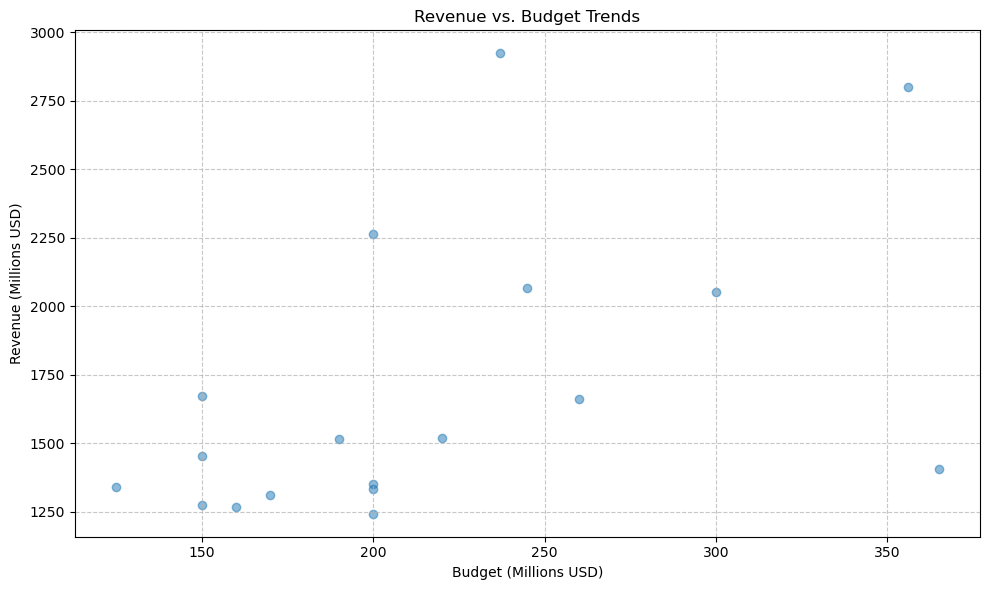

In [83]:
plot_revenue_vs_budget(data)

## ROI Distribution by Genre

In [84]:
def plot_roi_by_genre(df):
    """Visualize Mean ROI by Genre using a bar chart."""
    # Split genres (since they’re separated by '|') and explode into rows
    df_genres = df.assign(genres=df['genres'].str.split('|')).explode('genres')
    
    # Calculate mean ROI per genre
    roi_by_genre = df_genres.groupby('genres')['roi'].mean().sort_values(ascending=False)
    
    
    # Plotting
    plt.figure(figsize=(12, 6))
    roi_by_genre.plot(kind='bar', color='skyblue')
    plt.title("Mean ROI by Genre")
    plt.xlabel("Genre")
    plt.ylabel("Mean ROI (Revenue / Budget)")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()


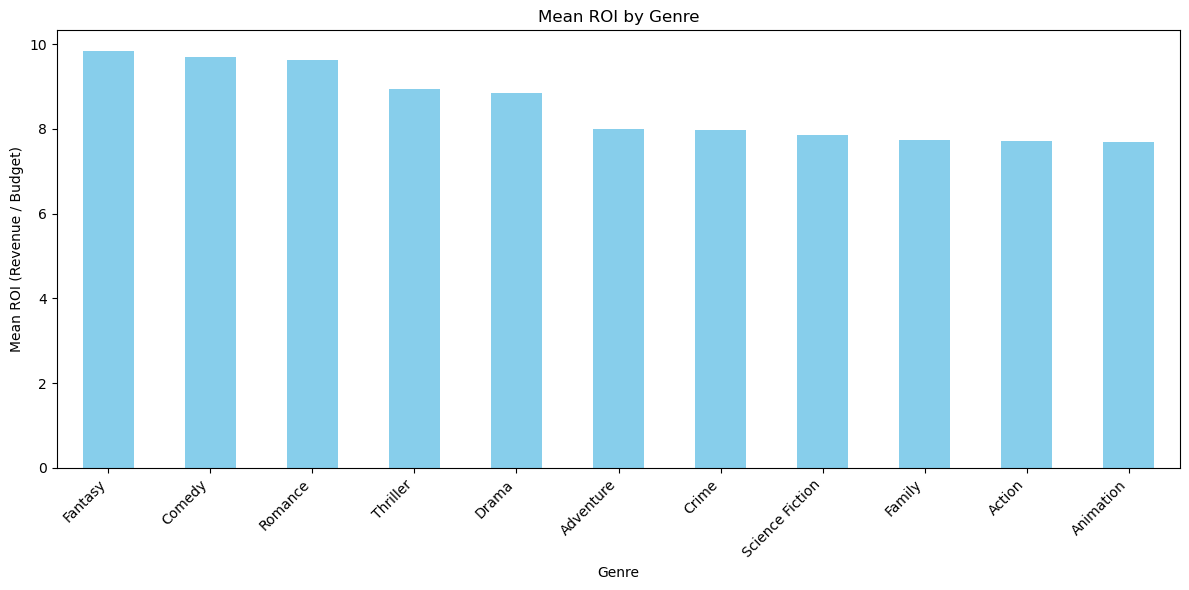

In [85]:
plot_roi_by_genre(data)

## Popularity vs. Rating

In [86]:
def plot_popularity_vs_rating(df):
    """Visualize Popularity vs. Rating using a scatter plot."""
    plt.figure(figsize=(10, 6))
    plt.scatter(df['popularity'], df['vote_average'], alpha=0.5)
    plt.title("Popularity vs. Rating")
    plt.xlabel("Popularity")
    plt.ylabel("Rating (Vote Average)")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

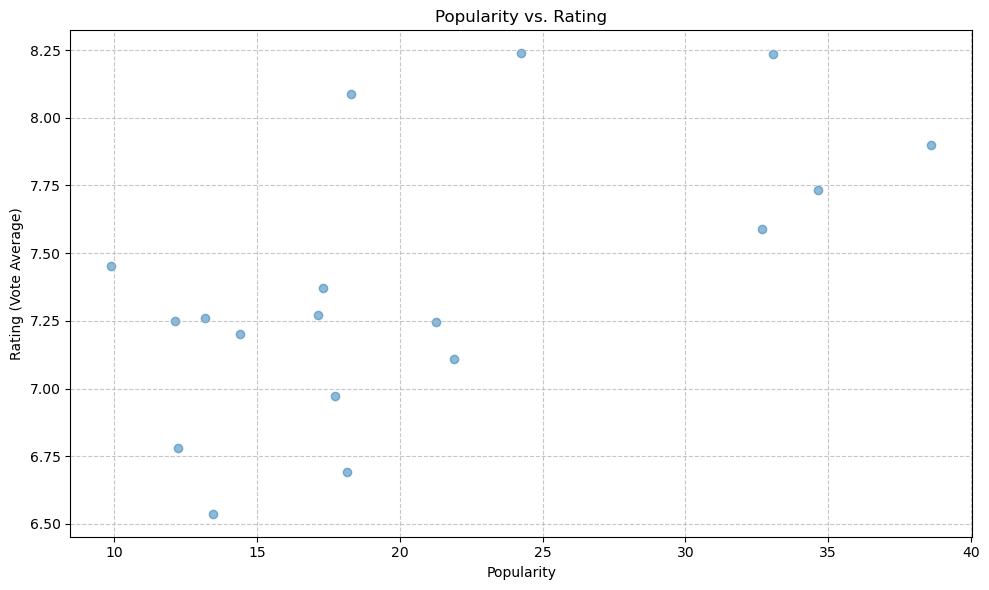

In [87]:
plot_popularity_vs_rating(data)

## Yearly Trends in Box Office Performance

In [88]:
def plot_yearly_box_office(df):
    """Visualize Yearly Trends in Box Office Performance using a line plot."""
    # Extract year from release_date
    df['year'] = pd.to_datetime(df['release_date']).dt.year
    
    # Group by year and calculate total revenue
    yearly_revenue = df.groupby('year')['revenue_millions'].sum()
    
    plt.figure(figsize=(12, 6))
    yearly_revenue.plot(kind='line', marker='o')
    plt.title("Yearly Trends in Box Office Performance")
    plt.xlabel("Year")
    plt.ylabel("Total Revenue (Millions USD)")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

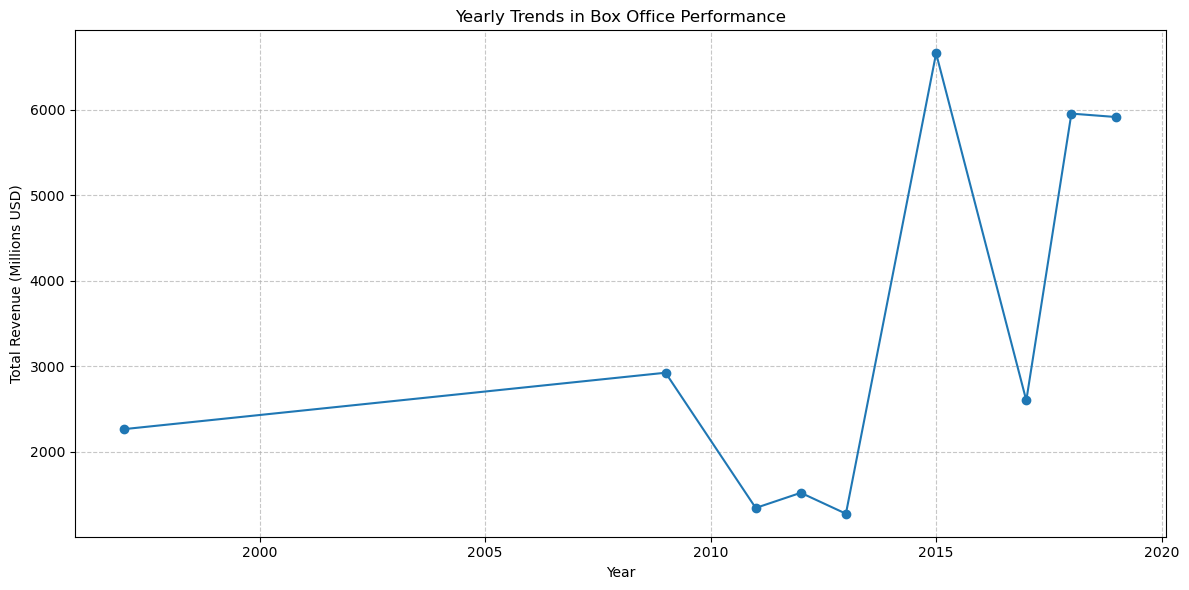

In [89]:
plot_yearly_box_office(data)

## Comparison of Franchise vs. Standalone Success

In [90]:
def plot_franchise_vs_standalone(df):
    """Visualize Comparison of Franchise vs. Standalone Success using a bar plot."""
    # Separate franchise and standalone
    franchise = df[df['belongs_to_collection'].notna()]
    standalone = df[df['belongs_to_collection'].isna()]
    
    # Calculate metrics
    metrics = {
        'Mean Revenue': franchise['revenue_millions'].mean(),
        'Mean Budget': franchise['budget_millions'].mean(),
        'Mean Rating': franchise['vote_average'].mean()
    }
    standalone_metrics = {
        'Mean Revenue': standalone['revenue_millions'].mean(),
        'Mean Budget': standalone['budget_millions'].mean(),
        'Mean Rating': standalone['vote_average'].mean()
    }
    
    # Prepare data for plotting
    comparison_df = pd.DataFrame({
        'Franchise': metrics,
        'Standalone': standalone_metrics
    })
    
    # Plot
    plt.figure(figsize=(10, 6))
    comparison_df.plot(kind='bar')
    plt.title("Franchise vs. Standalone Success")
    plt.xlabel("Metric")
    plt.ylabel("Value")
    plt.xticks(rotation=0)
    plt.legend(title="Movie Type")
    plt.tight_layout()

<Figure size 1000x600 with 0 Axes>

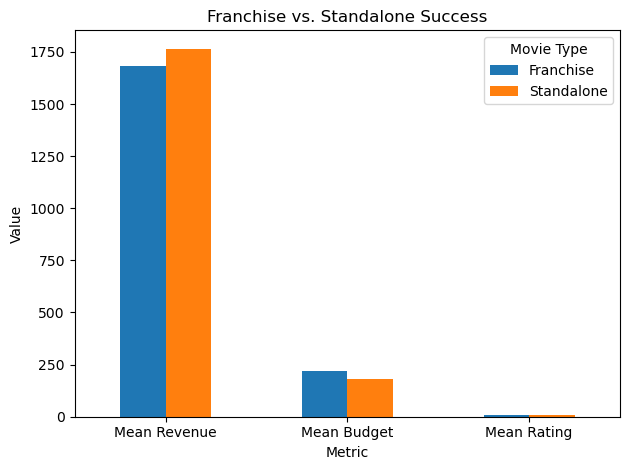

In [91]:
plot_franchise_vs_standalone(data)